In [5]:
import pandas as pd

df = pd.read_csv("clustered_skill_gap_dataset_2000.csv")

def to_list(x):
    if not isinstance(x, str):
        return []
    return [s.strip() for s in x.split(",") if s.strip()]

df["required_list"] = df["required_skills"].apply(to_list)
df["candidate_list"] = df["candidate_skills"].apply(to_list)
df["gap_list"] = df["expected_gap"].apply(to_list)

df.head()

,required_skills,candidate_skills,expected_gap,required_list,candidate_list,gap_list
0,"Go, B2B Sales, Marketing Analytics, SEM, Linux...","Adaptability, Diagnosis, Digital Marketing, Go...",B2B Sales,"[Go, B2B Sales, Marketing Analytics, SEM, Linu...","[Adaptability, Diagnosis, Digital Marketing, G...",[B2B Sales]
1,"Patient Examination, Creativity, B2C Sales, Ja...","Accounting, Arbitration, B2C Sales, Communicat...",NaN,"[Patient Examination, Creativity, B2C Sales, J...","[Accounting, Arbitration, B2C Sales, Communica...",[]
2,"Certified Public Accountant, Node.js, Agile, C...","Agile, CRM, Certified Public Accountant, Contr...","IFRS, Critical Thinking","[Certified Public Accountant, Node.js, Agile, ...","[Agile, CRM, Certified Public Accountant, Cont...","[IFRS, Critical Thinking]"
3,"Internal Medicine, GAAP, NLP, Chartered Accoun...","Angular, Audit, Brand Strategy, Chartered Acco...",Digital Marketing,"[Internal Medicine, GAAP, NLP, Chartered Accou...","[Angular, Audit, Brand Strategy, Chartered Acc...",[Digital Marketing]
4,"Budgeting, Litigation, Lead Generation, ASP.NE...","Leadership, Litigation, Performance Marketing,...","Budgeting, ASP.NET Core","[Budgeting, Litigation, Lead Generation, ASP.N...","[Leadership, Litigation, Performance Marketing...","[Budgeting, ASP.NET Core]"


In [8]:
### Shape of the dataset

In [6]:
df.shape

(2000, 6)

In [ ]:
## Check missing values

In [11]:
df.isna().sum()

required_skills       0
candidate_skills      0
expected_gap        370
required_list         0
candidate_list        0
gap_list              0
dtype: int64

In [12]:
### Average number of skills per field

In [13]:
df["n_required"] = df["required_list"].apply(len)
df["n_candidate"] = df["candidate_list"].apply(len)
df["n_gap"] = df["gap_list"].apply(len)

df[["n_required", "n_candidate", "n_gap"]].describe()


,n_required,n_candidate,n_gap
count,2000.000000,2000.000000,2000.000000
mean,8.013000,9.387000,1.565000
std,1.414507,2.164156,1.166386
min,6.000000,3.000000,0.000000
25%,7.000000,8.000000,1.000000
50%,8.000000,9.000000,1.000000
75%,9.000000,11.000000,2.000000
max,10.000000,15.000000,7.000000


In [14]:
###  Flatten skill lists to count frequency

In [15]:
from collections import Counter

req_counter = Counter([s for row in df["required_list"] for s in row])
cand_counter = Counter([s for row in df["candidate_list"] for s in row])
gap_counter = Counter([s for row in df["gap_list"] for s in row])

req_counter.most_common(20)


[('Litigation', 132),
 ('Critical Thinking', 126),
 ('R', 124),
 ('Recruitment', 121),
 ('Clinical Research', 121),
 ('Orthopedics', 121),
 ('NoSQL', 120),
 ('Strategic Planning', 118),
 ('Data Warehousing', 118),
 ('Tableau', 118),
 ('Compensation and Benefits', 118),
 ('Problem Solving', 117),
 ('PHP', 117),
 ('Process Improvement', 117),
 ('Git', 117),
 ('Digital Marketing', 116),
 ('Talent Acquisition', 116),
 ('Medical Practitioner', 116),
 ('Attorney', 116),
 ('Swift', 116)]

In [ ]:
### Plot skill distribution

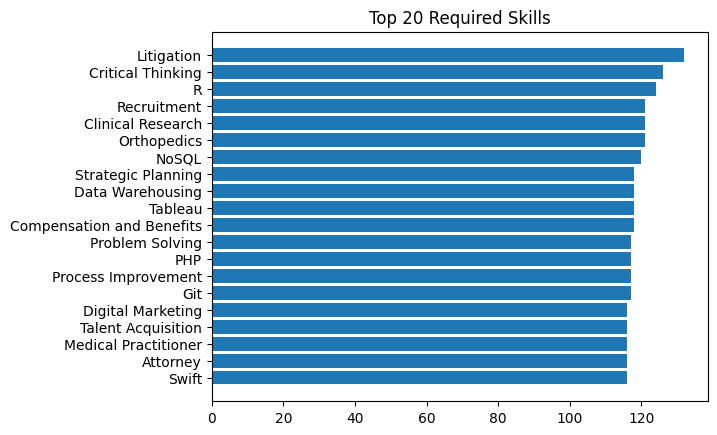

In [16]:
import matplotlib.pyplot as plt

top_req = req_counter.most_common(20)
skills, counts = zip(*top_req)
plt.barh(skills, counts)
plt.title("Top 20 Required Skills")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
### Cluster Behavior Analysis

In [18]:
from collections import defaultdict

cluster_freq_req = defaultdict(int)
cluster_freq_cand = defaultdict(int)

for _, row in df.iterrows():
    for s in row["required_list"]:
        cluster_freq_req[s.lower()] += 1
    for s in row["candidate_list"]:
        cluster_freq_cand[s.lower()] += 1

# Print some cluster-related skills
for skill in ["c#", ".net", "docker", "containerization", "doctor", "physician", "advocate", "lawyer"]:
    print(skill, "→",
          "required:", cluster_freq_req.get(skill.lower(), 0),
          "candidate:", cluster_freq_cand.get(skill.lower(), 0))


c# → required: 110 candidate: 130
.net → required: 102 candidate: 121
docker → required: 104 candidate: 107
containerization → required: 104 candidate: 145
doctor → required: 103 candidate: 125
physician → required: 109 candidate: 125
advocate → required: 105 candidate: 137
lawyer → required: 106 candidate: 116


In [ ]:
### Analyze Skill Coverage

In [19]:
df["coverage_ratio"] = df["n_candidate"] / df["n_required"]
df["gap_ratio"] = df["n_gap"] / df["n_required"]

df["coverage_ratio"].describe(), df["gap_ratio"].describe()


(count    2000.000000
 mean        1.183350
 std         0.246778
 min         0.500000
 25%         1.000000
 50%         1.166667
 75%         1.333333
 max         1.833333
 Name: coverage_ratio, dtype: float64,
 count    2000.000000
 mean        0.195828
 std         0.144122
 min         0.000000
 25%         0.111111
 50%         0.166667
 75%         0.285714
 max         0.833333
 Name: gap_ratio, dtype: float64)

In [20]:
### Which Skills Are Most Often Missing? (Gap Skills Analysis)

In [21]:
gap_counter.most_common(20)

[('Logistics', 33),
 ('Django', 32),
 ('Data Warehousing', 30),
 ('PHP', 29),
 ('Litigation', 28),
 ('Diagnosis', 28),
 ('R', 28),
 ('.NET Core', 27),
 ('Vue', 27),
 ('Recruitment', 27),
 ('Legal Research', 27),
 ('Spring Boot', 27),
 ('Compensation and Benefits', 27),
 ('Key Account Management', 27),
 ('Financial Analysis', 26),
 ('Computer Vision', 26),
 ('Presentation Skills', 26),
 ('Critical Thinking', 25),
 ('GCP', 25),
 ('Derivatives', 25)]

In [22]:
### Compare Required vs Candidate Skill Overlap

In [23]:
def jaccard(a, b):
    return len(set(a) & set(b)) / len(set(a) | set(b))

df["jaccard_similarity"] = df.apply(
    lambda r: jaccard(r["required_list"], r["candidate_list"]), axis=1
)

df["jaccard_similarity"].describe()


count    2000.000000
mean        0.516956
std         0.142491
min         0.071429
25%         0.416667
50%         0.500000
75%         0.615385
max         0.909091
Name: jaccard_similarity, dtype: float64

In [ ]:
### Identify Hard Cases

In [24]:
hard_cases = df[(df["jaccard_similarity"] < 0.3) & (df["n_gap"] < 3)]
hard_cases.head(20)

,required_skills,candidate_skills,expected_gap,required_list,candidate_list,gap_list,n_required,n_candidate,n_gap,coverage_ratio,gap_ratio,jaccard_similarity
4,"Budgeting, Litigation, Lead Generation, ASP.NE...","Leadership, Litigation, Performance Marketing,...","Budgeting, ASP.NET Core","[Budgeting, Litigation, Lead Generation, ASP.N...","[Leadership, Litigation, Performance Marketing...","[Budgeting, ASP.NET Core]",6,7,2,1.166667,0.333333,0.181818
56,"Scrum, .NET Core, Creativity, Communication, R...",".NET, Azure, Brand Strategy, Civil Law, Commun...","Creativity, Risk Management","[Scrum, .NET Core, Creativity, Communication, ...","[.NET, Azure, Brand Strategy, Civil Law, Commu...","[Creativity, Risk Management]",7,10,2,1.428571,0.285714,0.214286
166,"Tableau, Lead Generation, Criminal Law, Supply...",".NET Core, B2B Sales, CA, Clinical Research, C...","Tableau, TypeScript","[Tableau, Lead Generation, Criminal Law, Suppl...","[.NET Core, B2B Sales, CA, Clinical Research, ...","[Tableau, TypeScript]",7,9,2,1.285714,0.285714,0.230769
180,"Civil Law, Medical Practitioner, R, ASP.NET, B...",".NET Core, Budgeting, Chartered Accountant, Ci...",Medical Practitioner,"[Civil Law, Medical Practitioner, R, ASP.NET, ...","[.NET Core, Budgeting, Chartered Accountant, C...",[Medical Practitioner],6,10,1,1.666667,0.166667,0.230769
187,"Lawyer, DevOps, Swift, .NET, Power BI, Lead Ge...",".NET, AWS, Advocate, Attorney, HR, Power BI, P...",DevOps,"[Lawyer, DevOps, Swift, .NET, Power BI, Lead G...","[.NET, AWS, Advocate, Attorney, HR, Power BI, ...",[DevOps],6,10,1,1.666667,0.166667,0.230769
248,"Lawyer, Budgeting, Legal Research, Problem Sol...","Advocate, Budgeting, Civil Law, Corporate Law,...","Problem Solving, Strategic Planning","[Lawyer, Budgeting, Legal Research, Problem So...","[Advocate, Budgeting, Civil Law, Corporate Law...","[Problem Solving, Strategic Planning]",6,9,2,1.500000,0.333333,0.250000
265,"Advocate, ASP.NET, Accounting, Digital Marketi...",".NET, Azure, Certified Public Accountant, Lawy...",Team Leadership,"[Advocate, ASP.NET, Accounting, Digital Market...","[.NET, Azure, Certified Public Accountant, Law...",[Team Leadership],9,9,1,1.000000,0.111111,0.200000
298,"Investment Analysis, Data Engineering, Busines...","Accounting, Business Development, Closing Deal...",Google Ads,"[Investment Analysis, Data Engineering, Busine...","[Accounting, Business Development, Closing Dea...",[Google Ads],7,8,1,1.142857,0.142857,0.250000
376,"Diagnosis, .NET, Financial Analysis, Doctor, A...","C#, C++, Corporate Law, Diagnosis, Doctor, HR,...",Financial Analysis,"[Diagnosis, .NET, Financial Analysis, Doctor, ...","[C#, C++, Corporate Law, Diagnosis, Doctor, HR...",[Financial Analysis],6,9,1,1.500000,0.166667,0.250000
407,"GCP, Advocate, Leadership, NLP, TensorFlow, Ph...","Attorney, Business Development, Employee Engag...",GCP,"[GCP, Advocate, Leadership, NLP, TensorFlow, P...","[Attorney, Business Development, Employee Enga...",[GCP],6,9,1,1.500000,0.166667,0.250000
